# Make a Choropleth Map the hard way!

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)

### Main part is within the info, shape loop
### Right now it is random data
### Actual call should be something like what follows

###### color = plt.cm.colormap(currentValue / maximumValue)

### You can do some fancy stuff like logrithmic scaling of colors if you want.

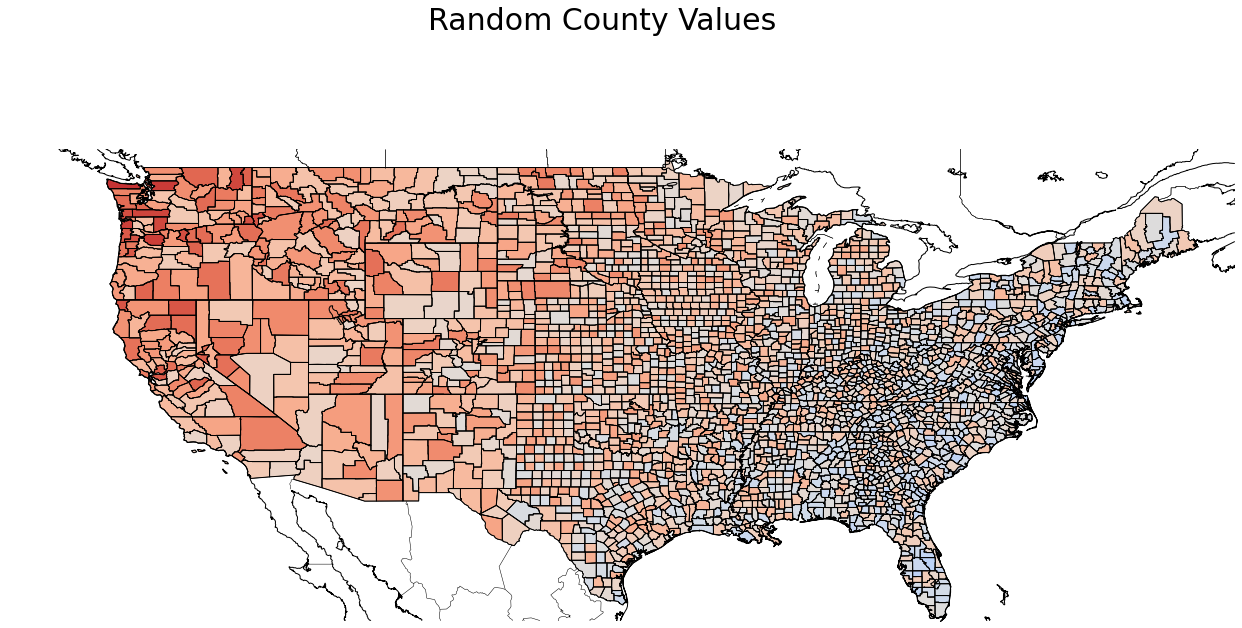

In [4]:
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Random County Values', fontsize=30, y=.95)

wLon = -130
eLon = -65
sLat = 25
nLat = 50

m = Basemap(projection='cyl',llcrnrlat=sLat,urcrnrlat=nLat,\
        llcrnrlon=wLon,urcrnrlon=eLon,area_thresh=1000.,resolution='i')
        
m.drawcoastlines()
m.drawstates()

m.readshapefile("UScounties", "counties")

for info, shape in zip(m.counties_info, m.counties):
  rnum = np.random.randint(0,100)
  color = plt.cm.coolwarm((shape[0][1]+-1*(shape[0][0]))/(nLat+-1*wLon+rnum))

  patches = [Polygon(np.array(shape), True)]
  pc = PatchCollection(patches,cmap=mpl.cm.coolwarm)
  pc.set_facecolor(color)
  ax.add_collection(pc)